In [92]:
import os
import pickle
import matplotlib.pyplot as plt

In [93]:
def combine_into(d: dict, combined: dict) -> None:
    for k, v in d.items():
        if isinstance(v, dict):
            combine_into(v, combined.setdefault(k, {}))
        else:
            combined[k] = v

def getResults(directory):
    results = {}
    results_dir = directory
    results_files = os.listdir(results_dir)

    for result in results_files:
        d = pickle.load(open(os.path.join(results_dir, result), 'rb'))
        combine_into(d, results)

    return results

results_small = getResults('results_46x70/')
# print(results_small)

In [94]:
small_avg = {
    'knn': {
        '40X': {}, '100X': {}, '200X': {}, '400X':{}
    },'svm':{
        '40X': {}, '100X': {}, '200X': {}, '400X':{}
    }, 'dt': {
        '40X': {}, '100X': {}, '200X': {}, '400X':{}
    }
}

In [95]:
for clf, r in results_small.items():
    print()
    print(clf)
    for mag, folds in r.items():
        print(mag)
        avg_accuracy, avg_precision, avg_recall, avg_f1 = 0, 0, 0, 0
        for fold, data in folds.items():
            print(fold)
            for k, v in data['weighted avg'].items():
                print(k, v)
            avg_accuracy += data["accuracy"]
            avg_precision += data["weighted avg"]['precision']
            avg_recall += data["weighted avg"]['recall']
            avg_f1 += data["weighted avg"]['f1-score']

        # if len(d) > 0 and len(folds) > 0:
        avg_accuracy = avg_accuracy / len(folds)
        avg_precision = avg_precision / len(folds)
        avg_recall = avg_recall / len(folds)
        avg_f1 = avg_f1 / len(folds)
        print("avg precision:", avg_precision)
        print("avg recall:", avg_recall)
        print("avg f1:", avg_f1)
        print("avg acc:", avg_accuracy)

        small_avg[clf][mag]['avg_precision'] = avg_precision
        small_avg[clf][mag]['avg_recall'] = avg_recall
        small_avg[clf][mag]['avg_f1'] = avg_f1
        small_avg[clf][mag]['avg_accuracy'] = avg_accuracy


knn
40X
fold_1
precision 0.8431757410252034
recall 0.8042328042328042
f1-score 0.7308184070419406
support 378
fold_2
precision 0.8508946135831382
recall 0.8459016393442623
f1-score 0.8172739102711623
support 305
fold_3
precision 0.8921058770998748
recall 0.892128279883382
f1-score 0.8796253710587277
support 343
fold_4
precision 0.8700550002007307
recall 0.8448753462603878
f1-score 0.802368432968676
support 361
fold_5
precision 0.7840116959064328
recall 0.8170426065162907
f1-score 0.775994989818396
support 399
avg precision: 0.848048585563076
avg recall: 0.8408361352474254
avg f1: 0.8012162222317805
avg acc: 0.8408361352474254
100X
fold_1
precision 0.8447602675834865
recall 0.8364116094986808
f1-score 0.8018395624376276
support 379
fold_2
precision 0.8345189293465155
recall 0.7896551724137931
f1-score 0.7092314899301817
support 290
fold_3
precision 0.8531600140056023
recall 0.8205882352941176
f1-score 0.7502389413746
support 340
fold_4
precision 0.8807465681157294
recall 0.872781065088

In [96]:
print(small_avg)

{'knn': {'40X': {'avg_precision': 0.848048585563076, 'avg_recall': 0.8408361352474254, 'avg_f1': 0.8012162222317805, 'avg_accuracy': 0.8408361352474254}, '100X': {'avg_precision': 0.8594883931289357, 'avg_recall': 0.8384155183458623, 'avg_f1': 0.7918191910483767, 'avg_accuracy': 0.8384155183458623}, '200X': {'avg_precision': 0.9304488416328424, 'avg_recall': 0.9184089696341455, 'avg_f1': 0.9203426484065259, 'avg_accuracy': 0.9184089696341455}, '400X': {'avg_precision': 0.8955551416620784, 'avg_recall': 0.8964817148522753, 'avg_f1': 0.8895058861967117, 'avg_accuracy': 0.8964817148522753}}, 'svm': {'40X': {'avg_precision': 0.8488552089328161, 'avg_recall': 0.8435251419288736, 'avg_f1': 0.8377375094459542, 'avg_accuracy': 0.8435251419288736}, '100X': {'avg_precision': 0.884934719210867, 'avg_recall': 0.8835430095720078, 'avg_f1': 0.8828809167130751, 'avg_accuracy': 0.8835430095720078}, '200X': {'avg_precision': 0.9435510823070805, 'avg_recall': 0.9319524626099849, 'avg_f1': 0.934562352760

In [97]:
# function to add value labels
def add_labels(x, y, pt):
    for i in range(len(x)):
        pt.text(i, y[i], round(y[i], 3), ha = 'center')

In [98]:
magnifications = ['40X', '100X', '200X', '400X']

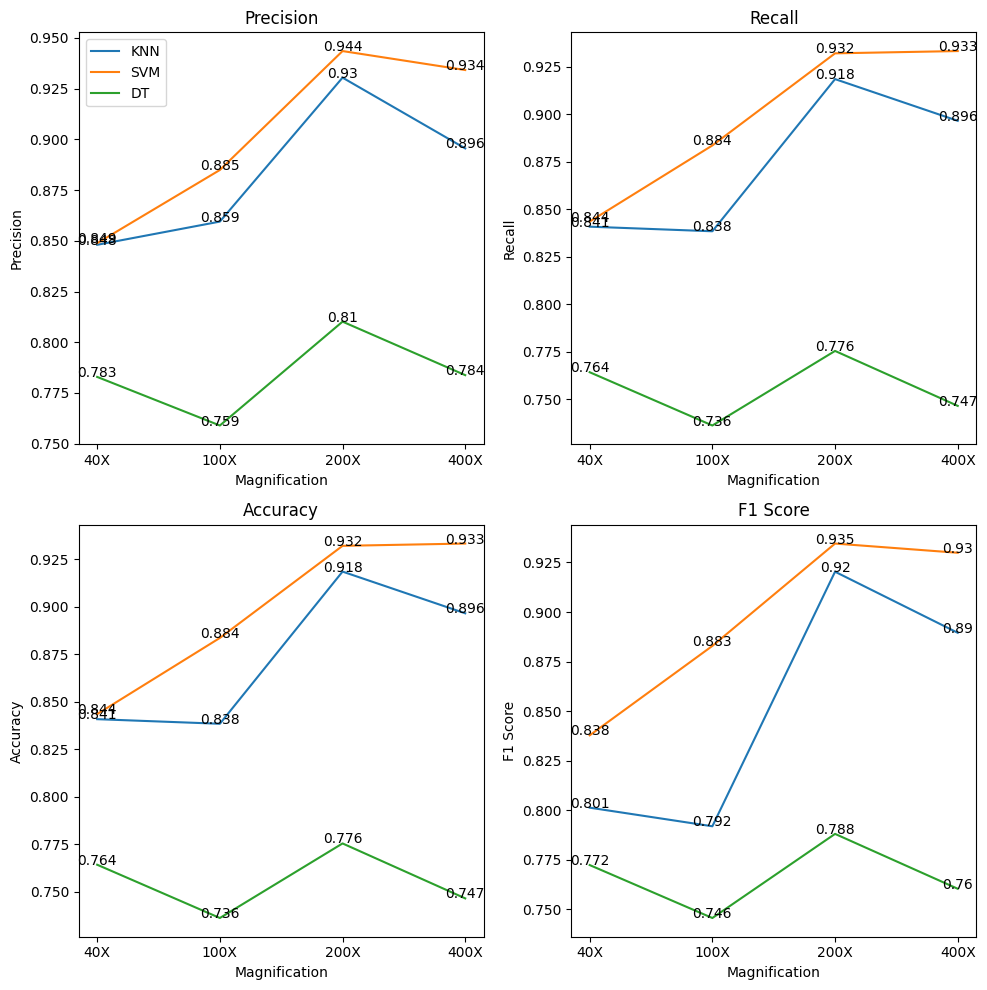

In [99]:
# Extract the precision and recall results_small
knn_precision = [small_avg['knn'][mag]['avg_precision'] for mag in magnifications]
svm_precision = [small_avg['svm'][mag]['avg_precision'] for mag in magnifications]
dt_precision = [small_avg['dt'][mag]['avg_precision'] for mag in magnifications]
knn_recall = [small_avg['knn'][mag]['avg_recall'] for mag in magnifications]
svm_recall = [small_avg['svm'][mag]['avg_recall'] for mag in magnifications]
dt_recall = [small_avg['dt'][mag]['avg_recall'] for mag in magnifications]
knn_f1 = [small_avg['knn'][mag]['avg_f1'] for mag in magnifications]
svm_f1 = [small_avg['svm'][mag]['avg_f1'] for mag in magnifications]
dt_f1 = [small_avg['dt'][mag]['avg_f1'] for mag in magnifications]
knn_accuracy = [small_avg['knn'][mag]['avg_accuracy'] for mag in magnifications]
svm_accuracy = [small_avg['svm'][mag]['avg_accuracy'] for mag in magnifications]
dt_accuracy = [small_avg['dt'][mag]['avg_accuracy'] for mag in magnifications]

# Create the figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.plot(magnifications, knn_precision, label='KNN')
ax1.plot(magnifications, svm_precision, label='SVM')
ax1.plot(magnifications, dt_precision, label='DT')
add_labels(magnifications, knn_precision, ax1)
add_labels(magnifications, svm_precision, ax1)
add_labels(magnifications, dt_precision, ax1)
ax1.set_xlabel('Magnification')
ax1.set_ylabel('Precision')
ax1.set_title('Precision')
ax1.legend()

ax2.plot(magnifications, knn_recall, label='KNN')
ax2.plot(magnifications, svm_recall, label='SVM')
ax2.plot(magnifications, dt_recall, label='DT')
add_labels(magnifications, knn_recall, ax2)
add_labels(magnifications, svm_recall, ax2)
add_labels(magnifications, dt_recall, ax2)
ax2.set_xlabel('Magnification')
ax2.set_ylabel('Recall')
ax2.set_title('Recall')

ax3.plot(magnifications, knn_accuracy, label='KNN')
ax3.plot(magnifications, svm_accuracy, label='SVM')
ax3.plot(magnifications, dt_accuracy, label='DT')
add_labels(magnifications, knn_accuracy, ax3)
add_labels(magnifications, svm_accuracy, ax3)
add_labels(magnifications, dt_accuracy, ax3)
ax3.set_xlabel('Magnification')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy')

ax4.plot(magnifications, knn_f1, label='KNN')
ax4.plot(magnifications, svm_f1, label='SVM')
ax4.plot(magnifications, dt_f1, label='DT')
add_labels(magnifications, knn_f1, ax4)
add_labels(magnifications, svm_f1, ax4)
add_labels(magnifications, dt_f1, ax4)
ax4.set_xlabel('Magnification')
ax4.set_ylabel('F1 Score')
ax4.set_title('F1 Score')

fig.tight_layout()

# Display the figure
plt.show()


In [100]:
results_aiims = getResults('results_aiims/')
results_aiims

{'knn': {'0': {'precision': 0.8148148148148148,
   'recall': 0.4230769230769231,
   'f1-score': 0.5569620253164557,
   'support': 52},
  '1': {'precision': 0.34782608695652173,
   'recall': 0.7619047619047619,
   'f1-score': 0.4776119402985074,
   'support': 21},
  'accuracy': 0.5205479452054794,
  'macro avg': {'precision': 0.5813204508856682,
   'recall': 0.5924908424908425,
   'f1-score': 0.5172869828074815,
   'support': 73},
  'weighted avg': {'precision': 0.6804755917322921,
   'recall': 0.5205479452054794,
   'f1-score': 0.5341352885304705,
   'support': 73}},
 'svm': {'0': {'precision': 0.7123287671232876,
   'recall': 1.0,
   'f1-score': 0.832,
   'support': 52},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21},
  'accuracy': 0.7123287671232876,
  'macro avg': {'precision': 0.3561643835616438,
   'recall': 0.5,
   'f1-score': 0.416,
   'support': 73},
  'weighted avg': {'precision': 0.507412272471383,
   'recall': 0.7123287671232876,
   'f1-score': 0.59

In [101]:
aiims_avg = {
    'knn': {
    },'svm':{
    }, 'dt': {
    }
}

In [102]:
for clf, data in results_aiims.items():
    print()
    print(clf)
    avg_accuracy, avg_precision, avg_recall, avg_f1 = 0, 0, 0, 0
    for k, v in data['weighted avg'].items():
        print(k, v)
    avg_accuracy += data["accuracy"]
    avg_precision += data["weighted avg"]['precision']
    avg_recall += data["weighted avg"]['recall']
    avg_f1 += data["weighted avg"]['f1-score']

    print("avg precision:", avg_precision)
    print("avg recall:", avg_recall)
    print("avg f1:", avg_f1)
    print("avg acc:", avg_accuracy)

    aiims_avg[clf]['avg_precision'] = avg_precision
    aiims_avg[clf]['avg_recall'] = avg_recall
    aiims_avg[clf]['avg_f1'] = avg_f1
    aiims_avg[clf]['avg_accuracy'] = avg_accuracy


knn
precision 0.6804755917322921
recall 0.5205479452054794
f1-score 0.5341352885304705
support 73
avg precision: 0.6804755917322921
avg recall: 0.5205479452054794
avg f1: 0.5341352885304705
avg acc: 0.5205479452054794

svm
precision 0.507412272471383
recall 0.7123287671232876
f1-score 0.5926575342465753
support 73
avg precision: 0.507412272471383
avg recall: 0.7123287671232876
avg f1: 0.5926575342465753
avg acc: 0.7123287671232876

dt
precision 0.653936867182847
recall 0.6438356164383562
f1-score 0.6484384538373258
support 73
avg precision: 0.653936867182847
avg recall: 0.6438356164383562
avg f1: 0.6484384538373258
avg acc: 0.6438356164383562


In [103]:
breakhis_best = {'knn': {}, 'svm': {}, 'dt': {}}

In [104]:
for clf, r in small_avg.items():
    breakhis_best[clf]['avg_precision'] = r['40X']['avg_precision']
    breakhis_best[clf]['avg_recall'] = r['40X']['avg_recall']
    breakhis_best[clf]['avg_f1'] = r['40X']['avg_f1']
    breakhis_best[clf]['avg_accuracy'] = r['40X']['avg_accuracy']

Text(0.5, 1.0, 'Accuracy')

<Figure size 1000x600 with 0 Axes>

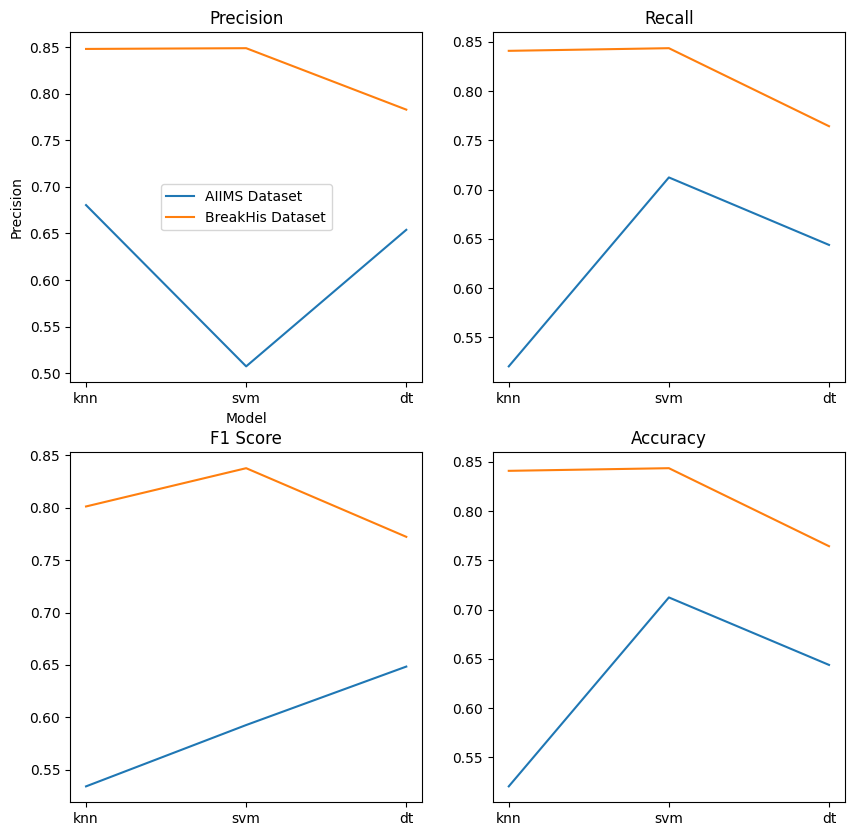

In [105]:
# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Set the x-axis values to be the models (knn, svm, dt)
x = ['knn', 'svm', 'dt']

# Set the y-axis values for the AIIMS Dataset dataset
y1 = [aiims_avg['knn']['avg_precision'], aiims_avg['svm']['avg_precision'], aiims_avg['dt']['avg_precision']]

# Set the y-axis values for the breakhis_best dataset
y2 = [breakhis_best['knn']['avg_precision'], breakhis_best['svm']['avg_precision'], breakhis_best['dt']['avg_precision']]

# Create the subplot for precision
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# Plot the precision values for the AIIMS Dataset and breakhis_best datasets
ax1.plot(x, y1, label='AIIMS Dataset')
ax1.plot(x, y2, label='BreakHis Dataset')

# Set the title and labels for the precision subplot
ax1.set_title('Precision')
ax1.set_xlabel('Model')
ax1.set_ylabel('Precision')
ax1.legend()

# Repeat the process for the remaining subplots (recall, F1 score, accuracy)
y1 = [aiims_avg['knn']['avg_recall'], aiims_avg['svm']['avg_recall'], aiims_avg['dt']['avg_recall']]
y2 = [breakhis_best['knn']['avg_recall'], breakhis_best['svm']['avg_recall'], breakhis_best['dt']['avg_recall']]

ax2.plot(x, y1, label='AIIMS Dataset')
ax2.plot(x, y2, label='BreakHis Dataset')
ax2.set_title('Recall')

# Repeat the process for the remaining subplots (recall, F1 score, accuracy)
y1 = [aiims_avg['knn']['avg_f1'], aiims_avg['svm']['avg_f1'], aiims_avg['dt']['avg_f1']]
y2 = [breakhis_best['knn']['avg_f1'], breakhis_best['svm']['avg_f1'], breakhis_best['dt']['avg_f1']]

ax3.plot(x, y1, label='AIIMS Dataset')
ax3.plot(x, y2, label='BreakHis Dataset')
ax3.set_title('F1 Score')

# Repeat the process for the remaining subplots (recall, F1 score, accuracy)
y1 = [aiims_avg['knn']['avg_accuracy'], aiims_avg['svm']['avg_accuracy'], aiims_avg['dt']['avg_accuracy']]
y2 = [breakhis_best['knn']['avg_accuracy'], breakhis_best['svm']['avg_accuracy'], breakhis_best['dt']['avg_accuracy']]

ax4.plot(x, y1, label='AIIMS Dataset')
ax4.plot(x, y2, label='BreakHis Dataset')
ax4.set_title('Accuracy')
